In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [3]:
## Read Data for the Fraudulent Email Kaggle Challenge
train_data = pd.read_csv("../data/kg_train.csv", encoding='latin-1')
test_data = pd.read_csv("../data/kg_test.csv", encoding='latin-1')

# Reduce the training set to speed up development. 
# Modify for final system
train_data = train_data.head(1000)
print('Train:', train_data.shape, 'Test:', test_data.shape)
train_data.fillna("", inplace=True)
test_data.fillna("", inplace=True)

Train: (1000, 2) Test: (5964, 1)


In [4]:
train_data.head()

,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


### Let's divide the training and test set into two partitions
- Use 80% of the data for training and 20% for testing
- Use random_state=42 for reproducibility
- Use stratify parameter to keep the proportion of spam and ham in both sets
- Use TfidfVectorizer to convert the text into numerical representation
- Use stop_words='english' and max_features=500
- Fit the vectorizer only on the training data and then transform both training and test data
```python


In [5]:
# Split the data if not already done
from sklearn.model_selection import train_test_split

# Use the 'text' column for features and 'label' for target
X = train_data['text']
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(800, 500) (200, 500)


## Data Preprocessing

In [6]:
import string
from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on']


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags


In [7]:
# Your code
def clean_html(text):
    # Remove inline JavaScript/CSS
    text = re.sub(r'<script.*?>.*?</script>', '', text, flags=re.DOTALL)
    text = re.sub(r'<style.*?>.*?</style>', '', text, flags=re.DOTALL)
    # Remove HTML comments
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)
    # Remove remaining HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

train_data['cleaned_text'] = train_data['text'].apply(clean_html)
test_data['cleaned_text'] = test_data['text'].apply(clean_html)
train_data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...","DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL..."
1,Will do.,Will do.
2,Nora--Cheryl has emailed dozens of memos about...,Nora--Cheryl has emailed dozens of memos about...
3,Dear Sir=2FMadam=2C I know that this proposal ...,Dear Sir=2FMadam=2C I know that this proposal ...
4,fyi,fyi


- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [8]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'^[a-zA-Z]\s+', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

train_data['preprocessed_text'] = train_data['cleaned_text'].apply(preprocess_text)
test_data['preprocessed_text'] = test_data['cleaned_text'].apply(preprocess_text)
train_data[['cleaned_text', 'preprocessed_text']].head()

,cleaned_text,preprocessed_text
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",dear sir strictly private business proposal am...
1,Will do.,will do
2,Nora--Cheryl has emailed dozens of memos about...,nora cheryl has emailed dozens of memos about ...
3,Dear Sir=2FMadam=2C I know that this proposal ...,dear sir fmadam i know that this proposal migh...
4,fyi,fyi


## Now let's work on removing stopwords
Remove the stopwords.

In [9]:
# Your code
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

train_data['no_stopwords_text'] = train_data['preprocessed_text'].apply(remove_stopwords)
test_data['no_stopwords_text'] = test_data['preprocessed_text'].apply(remove_stopwords)
train_data[['preprocessed_text', 'no_stopwords_text']].head()

,preprocessed_text,no_stopwords_text
0,dear sir strictly private business proposal am...,dear sir strictly private business proposal mi...
1,will do,
2,nora cheryl has emailed dozens of memos about ...,nora cheryl emailed dozens memos haiti weekend...
3,dear sir fmadam i know that this proposal migh...,dear sir fmadam know proposal might surprise e...
4,fyi,fyi


## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [10]:
# Your code
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

train_data['lemmatized_text'] = train_data['no_stopwords_text'].apply(lemmatize_text)
test_data['lemmatized_text'] = test_data['no_stopwords_text'].apply(lemmatize_text)
train_data[['no_stopwords_text', 'lemmatized_text']].head()

,no_stopwords_text,lemmatized_text
0,dear sir strictly private business proposal mi...,dear sir strictly private business proposal mi...
1,,
2,nora cheryl emailed dozens memos haiti weekend...,nora cheryl emailed dozen memo haiti weekend p...
3,dear sir fmadam know proposal might surprise e...,dear sir fmadam know proposal might surprise e...
4,fyi,fyi


## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

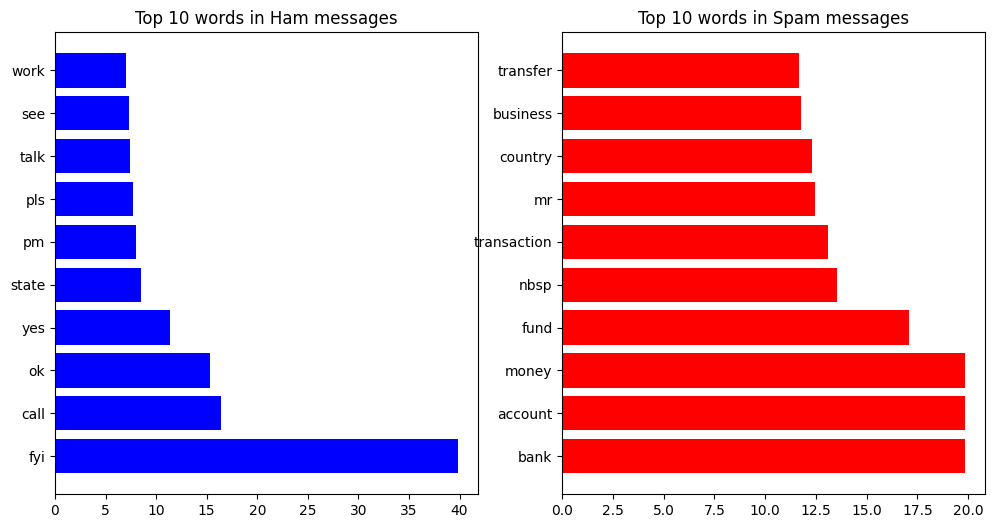

In [11]:
# Your code
from collections import Counter
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

ham_corpus = train_data[train_data['label'] == 0]['lemmatized_text']
spam_corpus = train_data[train_data['label'] == 1]['lemmatized_text']

top_ham_words = get_top_n_words(ham_corpus, n=10) if not ham_corpus.empty else []
top_spam_words = get_top_n_words(spam_corpus, n=10) if not spam_corpus.empty else []

df_ham = pd.DataFrame(top_ham_words, columns=['word', 'tfidf'])
df_spam = pd.DataFrame(top_spam_words, columns=['word', 'tfidf'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
if not df_ham.empty:
    plt.barh(df_ham['word'], df_ham['tfidf'], color='blue')
    plt.title('Top 10 words in Ham messages')
else:
    plt.title('No Ham messages found')
plt.subplot(1, 2, 2)
if not df_spam.empty:
    plt.barh(df_spam['word'], df_spam['tfidf'], color='red')
    plt.title('Top 10 words in Spam messages')
else:
    plt.title('No Spam messages found')
plt.show()

## Extra features

In [12]:
# We add to the original dataframe two additional indicators (money symbols and suspicious words).
money_simbol_list = "|".join(["euro","dollar","pound","€",r"\$"])
suspicious_words = "|".join(["free","cheap","sex","money","account","bank","fund","transfer","transaction","win","deposit","password"])

train_data['money_mark'] = train_data['preprocessed_text'].str.contains(money_simbol_list)*1
train_data['suspicious_words'] = train_data['preprocessed_text'].str.contains(suspicious_words)*1
train_data['text_len'] = train_data['preprocessed_text'].apply(lambda x: len(x)) 

test_data['money_mark'] = test_data['preprocessed_text'].str.contains(money_simbol_list)*1
test_data['suspicious_words'] = test_data['preprocessed_text'].str.contains(suspicious_words)*1
test_data['text_len'] = test_data['preprocessed_text'].apply(lambda x: len(x)) 

train_data.head()

,text,label,cleaned_text,preprocessed_text,no_stopwords_text,lemmatized_text,money_mark,suspicious_words,text_len
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",dear sir strictly private business proposal am...,dear sir strictly private business proposal mi...,dear sir strictly private business proposal mi...,1,1,2198
1,Will do.,0,Will do.,will do,,,0,0,8
2,Nora--Cheryl has emailed dozens of memos about...,0,Nora--Cheryl has emailed dozens of memos about...,nora cheryl has emailed dozens of memos about ...,nora cheryl emailed dozens memos haiti weekend...,nora cheryl emailed dozen memo haiti weekend p...,0,0,194
3,Dear Sir=2FMadam=2C I know that this proposal ...,1,Dear Sir=2FMadam=2C I know that this proposal ...,dear sir fmadam i know that this proposal migh...,dear sir fmadam know proposal might surprise e...,dear sir fmadam know proposal might surprise e...,1,1,2014
4,fyi,0,fyi,fyi,fyi,fyi,0,0,3


## How would work the Bag of Words with Count Vectorizer concept?

In [13]:
# Your code
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=500)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
print(X_train_count.shape, X_test_count.shape)

(800, 500) (200, 500)


## TF-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [14]:
# Your code
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(800, 500) (200, 500)


## And the Train a Classifier?

In [15]:
# Your code
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.97      0.97      0.97        88

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to **find the most relevant features**.

For example, you can test the following options and check which of them performs better:
- Using "Bag of Words" only
- Using "TF-IDF" only
- Bag of Words + extra flags (money_mark, suspicious_words, text_len)
- TF-IDF + extra flags


You can work with teams of two persons (recommended).

In [17]:
# Your code
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
results = {}
def evaluate_model(X_train, X_test, y_train, y_test, label):
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- {label} ---")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    results[label] = acc

# 1. Bag of Words only
evaluate_model(X_train_count, X_test_count, y_train, y_test, "Bag of Words only")

# 2. TF-IDF only
evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF only")

# 3. Bag of Words + extra flags
X_train_bow_extra = hstack([X_train_count, train_data.loc[X_train.index, ['money_mark','suspicious_words','text_len']].values])
X_test_bow_extra = hstack([X_test_count, train_data.loc[X_test.index, ['money_mark','suspicious_words','text_len']].values])
evaluate_model(X_train_bow_extra, X_test_bow_extra, y_train, y_test, "Bag of Words + extra flags")

# 4. TF-IDF + extra flags
X_train_tfidf_extra = hstack([X_train_tfidf, train_data.loc[X_train.index, ['money_mark','suspicious_words','text_len']].values])
X_test_tfidf_extra = hstack([X_test_tfidf, train_data.loc[X_test.index, ['money_mark','suspicious_words','text_len']].values])
evaluate_model(X_train_tfidf_extra, X_test_tfidf_extra, y_train, y_test, "TF-IDF + extra flags")

# Show summary of results
print("\nSummary of Accuracies:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


--- Bag of Words only ---
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.93      0.98      0.96        88

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


--- TF-IDF only ---
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.97      0.97      0.97        88

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


--- Bag of Words + extra flags ---
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.93      0.98      0.96        88

    accuracy                           0.96       200